In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
from scipy.stats import multivariate_normal
import scipy as sp

from scipy.io import loadmat
sns.set_style('whitegrid')

In [2]:
import os 
for i in os.listdir():
    if '.mat' in i:
        print(i)

ex8data1.mat
ex8data2.mat
ex8_movieParams.mat
ex8_movies.mat


In [3]:
data = loadmat('ex8data1.mat')
data.keys()

dict_keys(['__header__', '__version__', '__globals__', 'X', 'Xval', 'yval'])

In [4]:

X = data['X']
Xval = data['Xval']
yval = data['yval']


In [5]:
X.shape, Xval.shape,yval.shape

((307, 2), (307, 2), (307, 1))

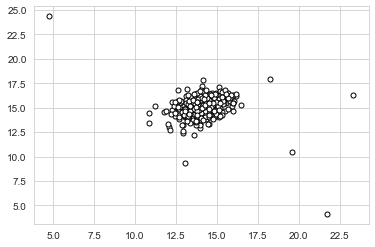

In [6]:
plt.plot(X[:,0], X[:,1], 'ko', ms=5, mfc='w');

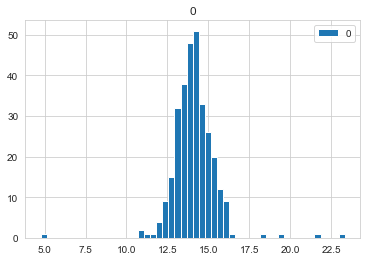

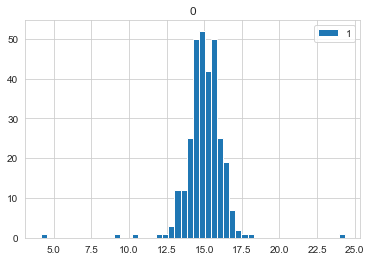

In [7]:
n= X.shape[1]

for i in range(n):
    pd.DataFrame(X[:,i]).hist(label=i, bins=50)
    plt.legend()
    plt.show()
  
# it seem like all the features are normally distributed   

# Return mean & variance

In [14]:
def estimateGaussian(X, multivariate=True):
    m,n = X.shape  
    import scipy as sp
    
    mean_ = np.sum(X,axis=0) / m
    
    
    if multivariate != True:
        var = (1/m) * sum((X - mean_)**2)        
    else: 
        var = sp.diag((1/m) * sum((X - mean_)**2))
#         var = np.dot((X - mean_).T, (X-mean_)) / m    # np.dot(nxm, mxn) 
                                                        # this formula for var will also return a nxn matrix, 
                                                        # can be effective for complex data 

    
    return mean_, var

In [15]:
mu, sigma = estimateGaussian(X)

# Return P(x)

In [10]:
def multiVariate_Gaussian(X, mu, sigma):
    m,n = X.shape

    
    norm = 1 / ((2*np.pi)**(n/2) * (np.sqrt(np.linalg.det(sigma))))
    
    
    exp_ = np.zeros((m,1))
    
    inv_ = np.linalg.inv(sigma)    # calculates inverse of nxn sigma
    
    for i in range(m):

        exp_[i] = np.exp(-0.5 * np.dot((np.dot((X[i] - mu).T , inv_ )), (X[i]-mu)))     # returns exp_ for m rows, hence p(x) for every record
    
    return norm * exp_

In [11]:
px = multiVariate_Gaussian(X, mu,sigma)

# Selecting best epsilon value / Evaluating

In [12]:

def select_threshold(yval, pval):
    best_f1 = 0
    best_epsilon = 0
    
    
    step = (np.max(pval) - np.min(pval))/1000              # after how many steps between max and min pval, we want a new epsilon
    
    for epsilon in np.arange(np.min(pval), np.max(pval), step):
        
        predictions = (pval < epsilon)
        tp = np.sum((predictions == 1) & (yval == 1))
        fp = np.sum((predictions == 1) & (yval == 0))
        fn = np.sum((predictions == 0) & (yval == 1))
        
        precision = tp / (tp+fp)
        recall = tp / (tp+fn)

        f1 = (2*precision*recall)/(precision+recall)       # (2 x precision x recall) /  (precision + recall)   
        
        if f1 > best_f1:                                   # if f1 will be greater than best_f1, previous value of best_f1 will be replaced with a new one
            best_f1 = f1
            best_epsilon = epsilon
    return best_epsilon, best_f1

In [13]:
pval = multiVariate_Gaussian(Xval, mu,sigma)

In [14]:
eps_,f1 = select_threshold(yval, pval)

In [15]:
eps_, f1

(8.990852779269496e-05, 0.8750000000000001)

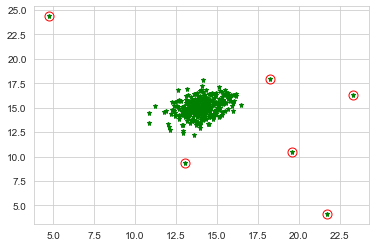

In [16]:
outliers = px < eps_

plt.plot(X.T[0], X.T[1], 'g*', ms=5)
plt.plot(X[:,0].reshape(-1,1)[outliers], X[:,1].reshape(-1,1)[outliers], 'ro', ms=9, mfc='None');

# Working on a bigger dataset

In [17]:
data = loadmat('ex8data2.mat')
data.keys()

dict_keys(['__header__', '__version__', '__globals__', 'X', 'Xval', 'yval'])

In [18]:
X = data['X']

Xval = data['Xval']
yval = data['yval']

In [19]:
X.shape, Xval.shape, yval.shape

((1000, 11), (100, 11), (100, 1))

In [20]:
mu2, sigma2 = estimateGaussian(X)

In [21]:

px = multiVariate_Gaussian(X, mu2,sigma2)

pval = multiVariate_Gaussian(Xval , mu2, sigma2)


In [22]:
eps_, f1 = select_threshold(yval, pval)

In [23]:
print('Best epsilon value found using cross validation: {}'.format(eps_))
print('Best F1 on cross validation: {}'.format(f1))


outliers = sum((px < eps_).astype('float'))
print('outliers found: {}'.format(outliers[0]))

Best epsilon value found using cross validation: 1.3772288907613627e-18
Best F1 on cross validation: 0.6153846153846154
outliers found: 117.0


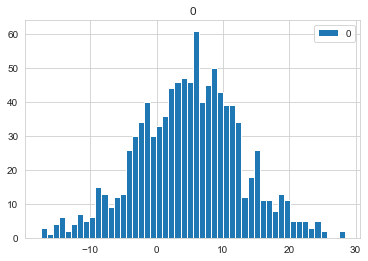

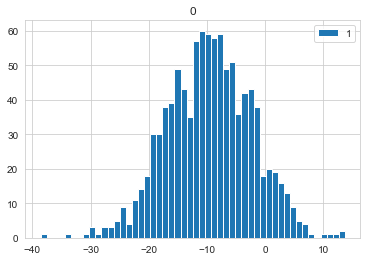

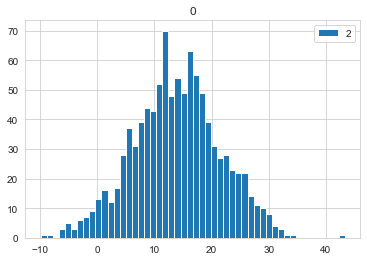

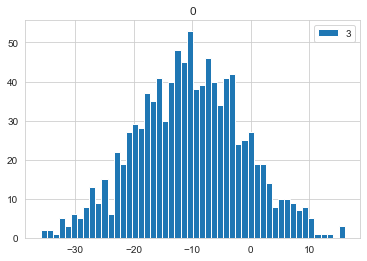

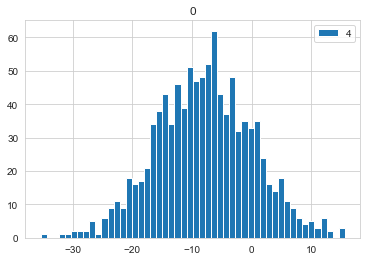

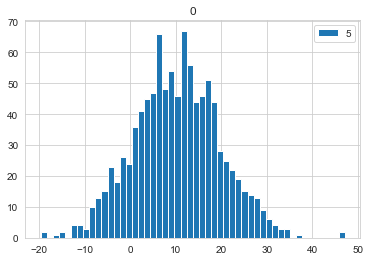

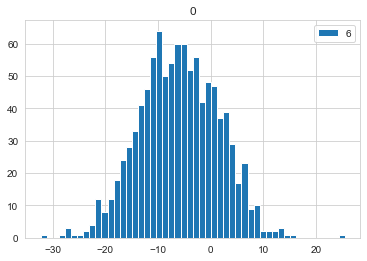

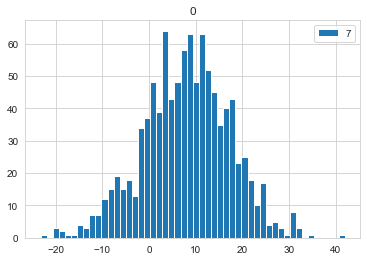

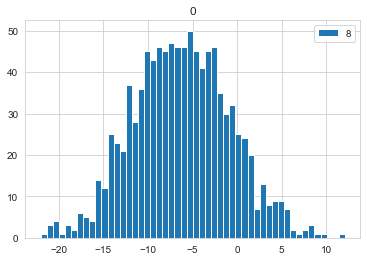

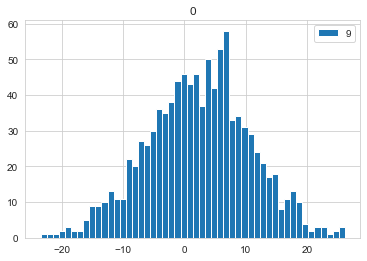

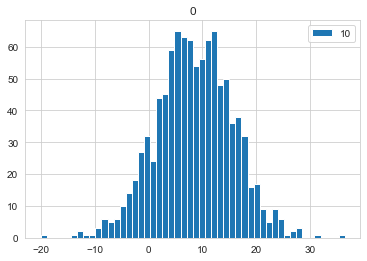

In [24]:
n= X.shape[1]

for i in range(n):
    pd.DataFrame(X[:,i]).hist(label=i, bins=50)
    plt.legend()
    plt.show()
    
# it seem like all the features are normally distributed    